In [61]:
import pandas as pd
import warnings
import plotly.express as plt
warnings.filterwarnings('ignore')
df=pd.read_csv('D:\\Projects\\U-4cast\\data\\data.csv')

In [62]:
df.head()

,date,time,min_temp,max_temp,avg_temp,humidity,AQI,baro_pressure
0,2022-07-01,00:00:00,20.3,24.3,22.3,85.02,273,1004.0
1,2022-07-01,01:00:00,20.1,24.1,22.1,85.00,272,1004.0
2,2022-07-01,02:00:00,24.4,28.4,26.4,98.81,265,997.7
3,2022-07-01,03:00:00,19.7,23.7,21.7,87.13,269,1003.0
4,2022-07-01,04:00:00,19.6,23.6,21.6,87.13,270,1003.0


In [63]:
df=df.dropna()
pre_df = df[['date','time','min_temp', 'avg_temp']]
predict_df = pre_df.groupby('date')['avg_temp'].mean().to_frame().reset_index()
predict_df['avg_temp'] = round(predict_df['avg_temp'],2)
# predict_df.rename(columns = {'min_temp':'avg_temp'}, inplace = True)
df = predict_df
print('Shape of data',df.shape)
df.head()
df
df=df.set_index('date')

Shape of data (169, 2)


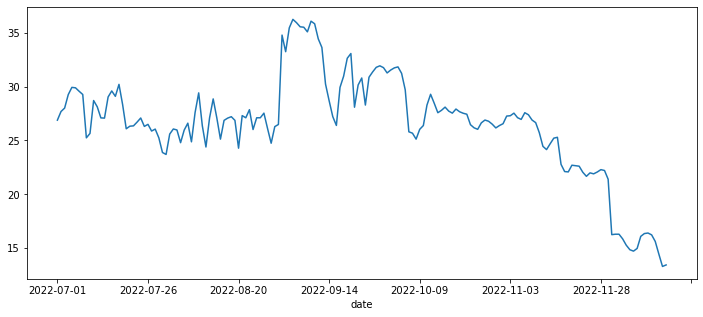

In [64]:
df['avg_temp'].plot(figsize=(12,5))

In [65]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [66]:
adf_test(df['avg_temp'])

1. ADF :  -1.0652046820388947
2. P-Value :  0.7287466061021849
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 168
5. Critical Values :
	 1% :  -3.4698858990744115
	 5% :  -2.8789026251889647
	 10% :  -2.5760266680839004


In [67]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['avg_temp'], suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -302.236
Date:                Fri, 16 Dec 2022   AIC                            606.471
Time:                        15:34:22   BIC                            609.595
Sample:                    07-01-2022   HQIC                           607.739
                         - 12-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.1386      0.110     19.375      0.000       1.922       2.355
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               362.98
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(169, 1)
(139, 1) (30, 1)
avg_temp    22.78
Name: 2022-11-17, dtype: float64 avg_temp    13.45
Name: 2022-12-16, dtype: float64


In [70]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['avg_temp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               avg_temp   No. Observations:                  139
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -250.656
Date:                Fri, 16 Dec 2022   AIC                            517.312
Time:                        15:34:38   BIC                            540.788
Sample:                    07-01-2022   HQIC                           526.852
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0043      1.008     27.795      0.000      26.030      29.979
ar.L1          0.8578      0.098      8.734      0.000       0.665       1.050
ma.L1          0.0305      0.136      0.224      0.823      -0.236       0.297
ma.L2         -0.0435      0.097     -0.450      0.653      -0.233       0.146
ma.L3          0.0440      0.117      0.375      0.708      -0.186       0.274
ma.L4         -0.0361      0.099     -0.363      0.717      -0.231       0.159
ma.L5          0.0163      0.115      0.142      0.887      -0.208       0.241
sigma2         2.1358      0.186     11.452      0.000       1.770       2.501
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               246.23
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2022-11-17    25.667099
2022-11-18    26.002996
2022-11-19    26.271510
2022-11-20    26.530415
2022-11-21    26.734795
2022-11-22    26.915358
2022-11-23    27.070239
2022-11-24    27.203091
2022-11-25    27.317048
2022-11-26    27.414797
2022-11-27    27.498643
2022-11-28    27.570563
2022-11-29    27.632254
2022-11-30    27.685171
2022-12-01    27.730561
2022-12-02    27.769496
2022-12-03    27.802893
2022-12-04    27.831540
2022-12-05    27.856112
2022-12-06    27.877190
2022-12-07    27.895269
2022-12-08    27.910777
2022-12-09    27.924080
2022-12-10    27.935490
2022-12-11    27.945278
2022-12-12    27.953673
2022-12-13    27.960874
2022-12-14    27.967051
2022-12-15    27.972350
2022-12-16    27.976895
Freq: D, Name: ARIMA predictions, dtype: float64


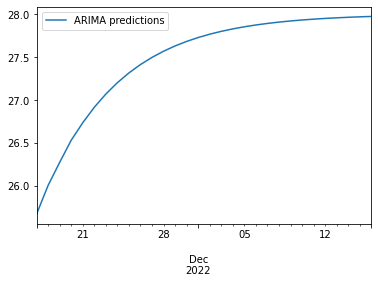

In [76]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
# index_future_dates=pd.date_range(start='2022-11-17',end='2022-12-16')
# pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
# pred.index=index_future_dates
pred.plot(legend=True)
print(pred)
# test['avg_temp'].plot(legend=True)

In [26]:
# pred.plot(legend='ARIMA Predictions')
# test['avg_temp'].plot(legend=True)

In [77]:
test['avg_temp'].mean()

18.568000000000005

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['avg_temp']))
print(rmse)


9.735370984444288


In [79]:
model2=ARIMA(df['avg_temp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,avg_temp
date,
2022-12-12,16.24
2022-12-13,15.63
2022-12-14,14.45
2022-12-15,13.31
2022-12-16,13.45


In [82]:
index_future_dates=pd.date_range(start='2022-12-16',end='2022-12-19')
# print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+3,typ='levels').rename('ARIMA Predictions')
# print(pred)
pred.index=index_future_dates
print(pred)

2022-12-16    13.895408
2022-12-17    14.259313
2022-12-18    14.568380
2022-12-19    14.781445
Freq: D, Name: ARIMA Predictions, dtype: float64


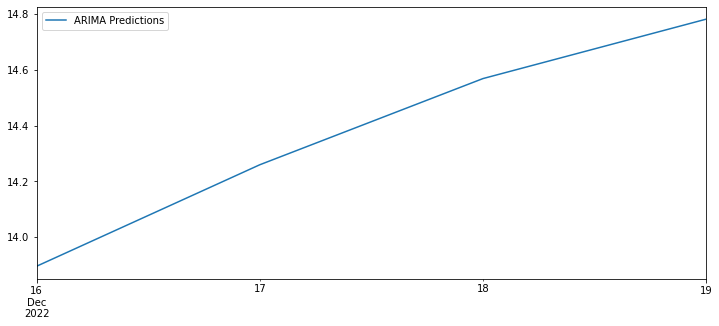

In [58]:
pred.plot(figsize=(12,5),legend=True)
